4.9.0


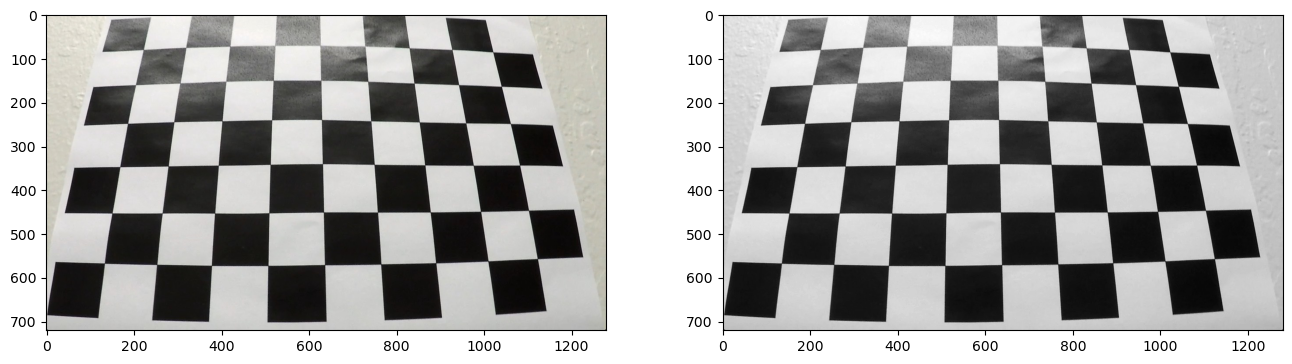

In [213]:
from __future__ import print_function

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

cal = plt.imread('calibration3.jpg')

fig1 = plt.figure(1, figsize=(16, 9))
cal_gray = cv2.cvtColor(cal, cv2.COLOR_RGB2GRAY)
plt.subplot(2,2,1)
plt.imshow(cal)
plt.subplot(2,2,2)
plt.imshow(cal_gray, cmap='gray')
print(cv2.__version__)


使用OpenCV找出棋盘的对角点

In [214]:
ret, corners = cv2.findChessboardCorners(cal_gray, (9, 6),None)
if ret == True:
    # cal = cal.copy()
    cal = cv2.drawChessboardCorners(cal, (9, 6), corners, ret)
    # cal = cal.copy()
plt.imshow(cal)



error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'drawChessboardCorners'
> Overload resolution failed:
>  - image marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'image'


In [ ]:
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

img_points = []
obj_points = []

img_points.append(corners)
obj_points.append(objp)

In [ ]:
image_size = (cal.shape[1], cal.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,
 image_size, None, None)


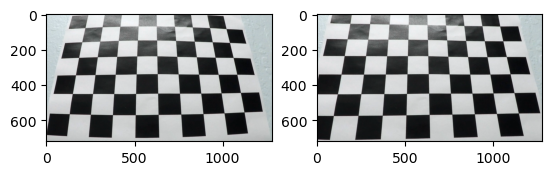

In [ ]:
# Read in a test image
img = cv2.imread('calibration3.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(undist)

确定ROI

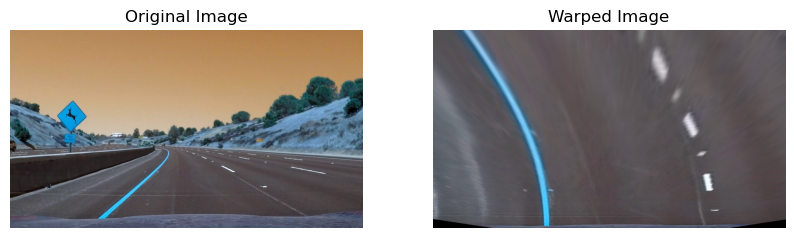

In [220]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
straight_lines1 = cv2.imread('test2.jpg')

# 定义透视变换函数
def perspective_transform(img, M):
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

# 定义源点和目标点的坐标
corners = [(603, 445), (677, 445), (1105, 720), (205, 720)]
wrap_offset = 150
src_corners = [(603, 445), (677, 445), (1105, 720), (205, 720)]
dst_corners = [(205 + wrap_offset, 0), (1105 - wrap_offset, 0), (1105 - wrap_offset, 720), (205 + wrap_offset, 720)]

# 计算透视变换矩阵 M
M = cv2.getPerspectiveTransform(np.float32(src_corners), np.float32(dst_corners))

# 应用透视变换
wrap_img = perspective_transform(straight_lines1, M)

# 创建一个包含两个子图的图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 在第一个子图中显示原始图像
ax1.imshow(straight_lines1)
ax1.set_title('Original Image')
ax1.axis('off')  # 关闭坐标轴

# 在第二个子图中显示变换后的图像
ax2.imshow(wrap_img)
ax2.set_title('Warped Image')
ax2.axis('off')  # 关闭坐标轴

# 显示图表
plt.show()